<a href="https://colab.research.google.com/github/Sandeshwebdev1999/EDA_python/blob/main/Clustering_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name**    -  **Online Retail Data Prediction**



____

##### **Project Type**    - Clustring



____

##### **Contribution**    - Individual
##Student Name : **Sandesh Ingle**

____

## **Project Summary -**

####This project focuses on customer segmentation through clustering techniques to identify distinct customer groups based on purchasing behaviors. Using K-Means clustering, we analyzed a dataset containing customer transaction data, including features such as quantity, unit price, and sentiment scores derived from product descriptions.

####After preprocessing and standardizing the data, the Elbow Method was applied to determine the optimal number of clusters, leading to the identification of four key customer segments:


- **Bulk Buyers (Low Cost):** Customers who purchase in large quantities but prefer low-priced items.

- **Regular Customers:** Customers who buy a moderate amount of products at mid-range prices.

- **High-Spending Customers:** Premium customers who buy fewer, but more expensive, items.

- **Moderate Bulk Buyers:** Customers purchasing in relatively high quantities at mid-range prices.

**This segmentation helps businesses understand different customer behaviors, enabling targeted marketing strategies, personalized offers, and optimized inventory management. The project showcases how clustering can be leveraged to derive actionable insights from transaction data.**

_____

## **GitHub Link -**


---

## **Problem Statement -**

####The goal of this project is to analyze customer transaction data and segment the customer base into distinct groups based on their purchasing behaviors. By identifying patterns such as purchase quantity, product pricing, and sentiment of product descriptions, we aim to help businesses better understand their customers. This segmentation will provide insights into customer preferences, enabling more targeted marketing strategies, improved product offerings, and optimized inventory management. The challenge is to apply appropriate data preprocessing, clustering algorithms, and evaluation methods to accurately segment the customer base and derive meaningful business insights.

____

## ***Let's Begin !***

---

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew
from scipy.stats import pearsonr
from wordcloud import WordCloud

---

### Dataset Loading

In [2]:
# Load Dataset
path = '/content/drive/MyDrive/Copy of Online Retail.xlsx'
df=pd.read_excel(path)

---

### Dataset First View

In [3]:
# # Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


---

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

---

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


___

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(5268)

---

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


___

### What did we know about this dataset?

In [8]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

This dataset related to **retail transactions** or **sales data**, commonly used for customer segmentation, product analysis, or inventory management. Here's what we can infer about each column and how it might relate to clustering:

### **Column Breakdown:**
1. **InvoiceNo**: Unique identifier for each transaction (likely categorical).

2. **StockCode**: Product identifier (categorical, could be useful for grouping similar products).

3. **Description**: Text description of the product (not directly useful for clustering unless converted into numerical features).

4. **Quantity**: Number of units purchased (important for customer purchasing behavior).

5. **InvoiceDate**: Timestamp of the transaction (can be used to extract time-based features like seasonality or trends).

6. **UnitPrice**: Price per unit of the product (helps analyze price sensitivity and customer spending habits).

7. **CustomerID**: Unique identifier for each customer (useful for customer-based clustering).

8. **Country**: Country of the customer (useful for regional analysis and segmentation).

### **How It Can Be Used for Clustering:**
- **Customer Segmentation:** Grouping customers based on purchasing behavior (e.g., high spenders vs. low spenders).

- **Product Clustering:** Finding similar products based on sales volume and price.

- **Temporal Clustering:** Identifying seasonal shopping trends.


___

## ***2. Understanding Variables***

In [9]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

____

In [10]:
# Dataset Describe
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


____

In [11]:
# Check Unique Values for each variable.
unique_counts = df.nunique()
unique_counts

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


___

## ***3. Data Wrangling***

#### Missing Values/Null Values

In [12]:
# Check for null values %.
for col in df.columns:
  null_rate = df[col].isnull().sum() / len(df) * 100
  if null_rate > 0:
    print(f'The null values in {col} column are  {df[col].isnull().sum()} Percentage:- {null_rate}%')

The null values in Description column are  1454 Percentage:- 0.2683107311375157%
The null values in CustomerID column are  135080 Percentage:- 24.926694334288598%


____

<Axes: >

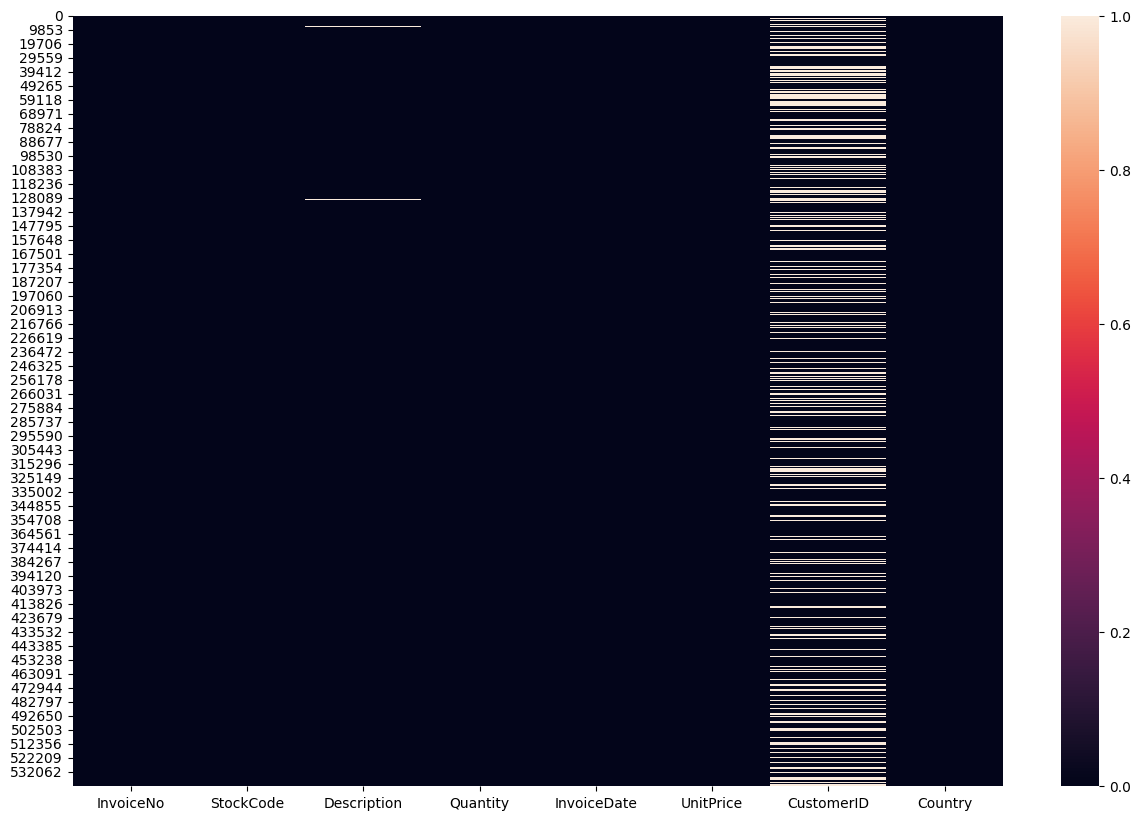

In [13]:
# let's visualizing  the null values
plt.figure(figsize=(15,10))
sns.heatmap(df.isna())

____

#### Null value treatment

In [14]:
df['Description'].replace(np.nan, "unknown",inplace  = True)
df.drop(['CustomerID'], axis=1, inplace=True)

In [15]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


**Our dataset has been thoroughly cleaned, ensuring that it is free from null values and ready for analysis.**

____

**Reviewing the head (first few rows) and tail (last few rows) of the dataset helps verify data integrity, identify potential anomalies, and ensure consistency in formatting and structure before proceeding with further analysis.**

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [17]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,France


____

#### This code processes the **InvoiceDate** column to extract useful time-based features for further analysis in a clustering project. The main objectives are:  

- **Enhancing Time-Based Analysis:** By extracting **Year, Month, Day, Hour, and DayOfWeek**, we can analyze purchasing patterns, seasonal trends, and customer behavior.  

- **Improving Feature Engineering for Clustering:** These time-based features can help in segmenting customers based on their purchasing habits (e.g., peak shopping hours, weekday vs. weekend purchases).  

- **Optimizing Data for Modeling:** The original **InvoiceDate** column is dropped after extracting relevant features, reducing redundancy and improving model efficiency.  


In [18]:
# Handle date features
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day

# Extract time-based features
df['Hour'] = df['InvoiceDate'].dt.hour
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek  # Monday=0, Sunday=6

# Droping original InvoiceDate not needed
df = df.drop(columns=['InvoiceDate'])


____

**Now, let's examine the structure of the processed data to ensure the transformations were applied correctly.**

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Year,Month,Day,Hour,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,2010,12,1,8,2
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,2010,12,1,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,2010,12,1,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,2010,12,1,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,2010,12,1,8,2


____

**This code analyzes the distribution of transactions by day of the week, identifying the most frequent shopping days. This helps understand customer behavior and can guide marketing or sales strategies.**

____

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

####**Objective:**

This code visualizes transaction counts by day of the week to identify peak shopping days, helping inform business strategies and customer behavior analysis.

In [20]:
df['DayOfWeek'].value_counts().sort_values(ascending=False)

,count
DayOfWeek,
3,103857
1,101808
0,95111
2,94565
4,82193
6,64375


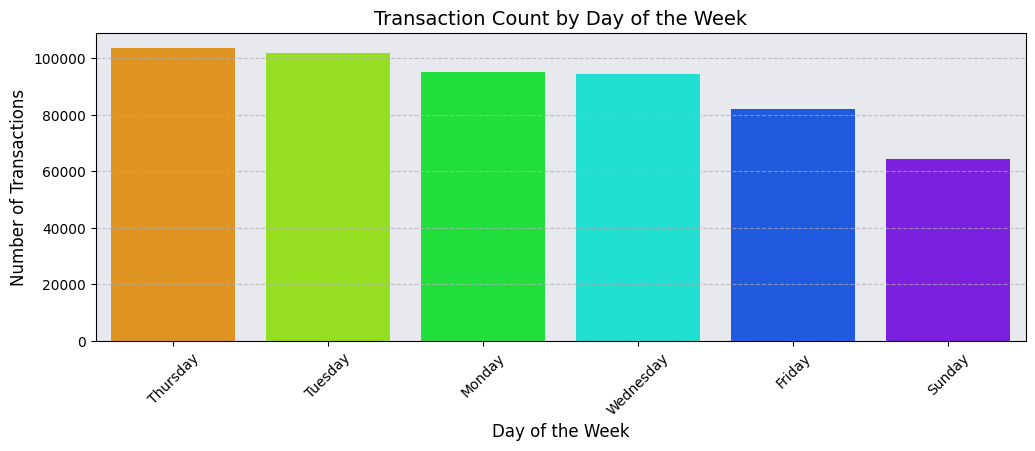

In [21]:
# Count occurrences of each day
day_counts = df['DayOfWeek'].value_counts().sort_values(ascending=False)

# Map numerical days to actual day names
day_labels = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
              4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
day_counts.index = day_counts.index.map(day_labels)

# Plot
plt.figure(figsize=(12, 4))
ax=sns.barplot(x=day_counts.index, y=day_counts.values, palette="gist_rainbow")
ax.set_facecolor("#e8e8ef")

plt.title("Transaction Count by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### **Meaningful Insights & Business Actions:**
1️⃣ **Mid-Week Peak (Tuesday-Wednesday-Thursday)**  
   - These are the busiest shopping days.  
   - Consider **restocking inventory mid-week** to handle demand.  
   - **Run special discounts on low-performing products on these days** to boost sales.  

2️⃣ **Low Sales on Weekends (Friday-Sunday Drop)**  
   - Fewer purchases may indicate a shift in customer habits.  
   - If you expect higher weekend sales, **launch targeted promotions (weekend sales, flash deals).**  
   - **Check if weekends have fewer business customers**—B2B clients may buy mostly on weekdays.  

3️⃣ **Why is Sunday the Lowest?**  
   - Some stores/warehouses may have reduced operations on weekends.  
   - Customers may prefer offline shopping on weekends instead of online.  
   - If e-commerce, consider **special Sunday deals to attract buyers.**  


___

#### **Objective:**

Extract the top 10 most frequent countries in a DataFrame column **Country** and count how many times each appears.

In [22]:
top_countries = df['Country'].value_counts().head(10)
top_countries

,count
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


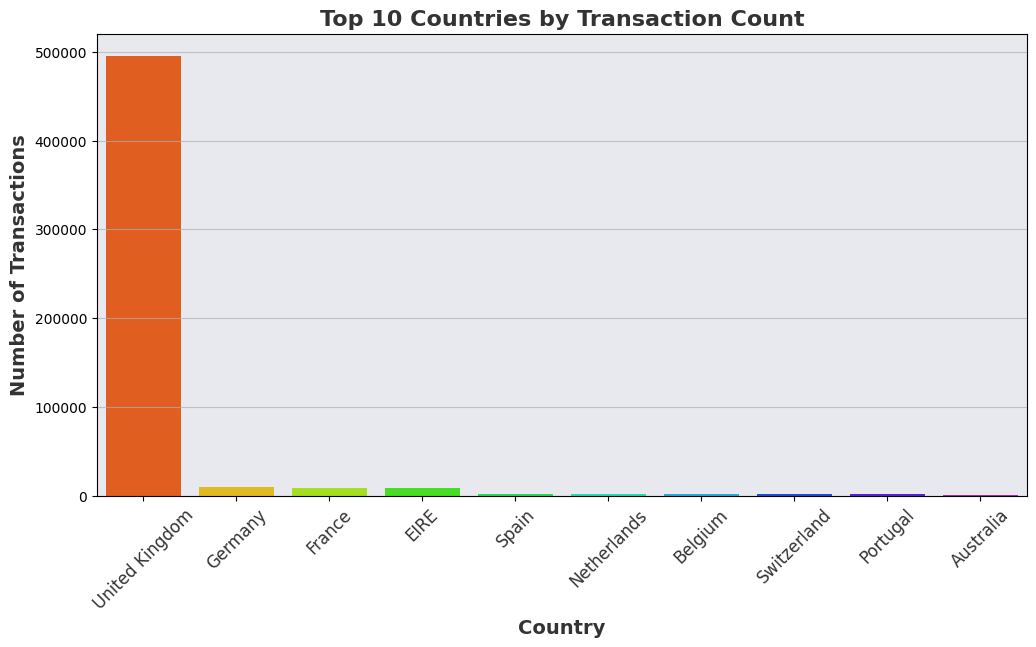

In [23]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_countries.index, y=top_countries.values, palette="gist_rainbow")
ax.set_facecolor("#e8e8ef")
# Set title and labels
plt.title("Top 10 Countries by Transaction Count", fontsize=16, fontweight='bold', color="#333333")
plt.xlabel("Country", fontsize=14, fontweight='bold', color="#333333")
plt.ylabel("Number of Transactions", fontsize=14, fontweight='bold', color="#333333")
plt.xticks(rotation=45, fontsize=12, color="#333333")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.show()

#### **Meaningful Insights from Country-Wise Transaction Data**  

**1. UK is the dominant market**  
   - **Insight:** Almost **95% of transactions** come from the UK.

   - **Action:** Focus on **customer retention & loyalty programs** in the UK.  

**2. European expansion opportunities**  
   - **Insight:** Germany, France, and Ireland have **moderate sales** but **high potential for growth**.  
   
   - **Action:** Consider **localized marketing campaigns** or special offers to boost sales.  

**3. Global expansion potential**  
   - **Insight:** Australia is the **only non-European country** in the top 10.  
   
   - **Action:** Test demand in **other international markets** (e.g., USA, Canada, Asia).  

**4. Low-transaction countries need targeted strategies**  
   - **Insight:** Spain, Netherlands, and Belgium have low sales compared to bigger markets.  
   
   - **Action:** Investigate whether it’s due to **pricing, shipping costs, or local competition**.  


#### **Conclusion**  

 **UK dominates** (95% of transactions) → Focus on customer retention.  

 **Germany, France, & Ireland show growth potential** → Localized marketing can boost sales.  

 **Other European markets (Spain, Netherlands, etc.) have low but steady demand** → Investigate barriers like shipping & pricing.  

 **Australia is the only non-European country** → Indicates potential for global expansion.  



____


#### **Objective:**  

To **analyze monthly trends in sales/quantity data** by summing transactions per month, helping identify peak periods, optimize inventory, and plan business strategies.  


In [24]:
monthly_quantity = df.groupby('Month')['Quantity'].sum()
monthly_quantity

,Quantity
Month,
1,308966
2,277989
3,351872
4,289098
5,380391
6,341623
7,391116
8,406199
9,549817


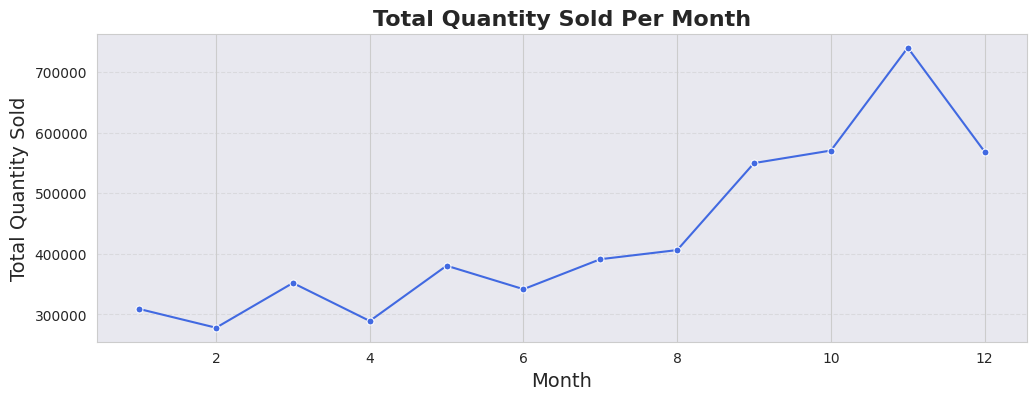

In [25]:
# Set figure size and style
plt.figure(figsize=(12, 4))
sns.set_style("whitegrid")

# Create the line plot
ax=sns.lineplot(x=monthly_quantity.index, y=monthly_quantity.values, marker='o', color='royalblue', linewidth=1.5, markersize=5)
ax.set_facecolor("#e8e8ef")
# Add labels and title
plt.title("Total Quantity Sold Per Month", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Quantity Sold", fontsize=14)

# Display the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add a subtle grid for readability
plt.show()


#### **Meaningful Insights from Monthly Quantity Data**  

1️⃣ **Sales Peak in November (740,286 units)**

   - **Highest monthly sales**—likely due to **holiday season, Black Friday, or year-end promotions.**
   
   - **Action:** Plan for **increased inventory, marketing campaigns, and logistics efficiency** in November.  

2️⃣ **Gradual Growth from July to November**

   - Sales **increase steadily** from July (391,116) to November (740,286).  

   - **Action:** Identify **what drives this growth**—seasonal demand, new product launches, or marketing efforts.  

3️⃣ **Dip in February (277,989 units)**

   - February shows the **lowest sales** (possibly due to fewer shopping events or shorter month).  

   - **Action:** Consider **flash sales, seasonal discounts, or marketing pushes** in February.  

4️⃣ **Consistent Growth After Summer (August - December)**
   - August (406,199) to December (568,561) shows strong and stable growth.

   - **Action:** Maintain **high stock levels & optimize supply chain** to meet demand.  

5️⃣ **September & October Show Strong Pre-Holiday Sales**

   - September (549,817) and October (570,532) **prepare for holiday season demand.**  

   - **Action:** Use these months for **aggressive promotions, early holiday discounts, and bulk order incentives.**  


____

####**Objective:**

Identify which days of the week have the highest and lowest sales quantities to optimize staffing, inventory, and promotions.  


In [26]:
DayOfWeek_quantity = df.groupby('DayOfWeek')['Quantity'].sum()
DayOfWeek_quantity

,Quantity
DayOfWeek,
0,815354
1,961543
2,969558
3,1167823
4,794440
6,467732


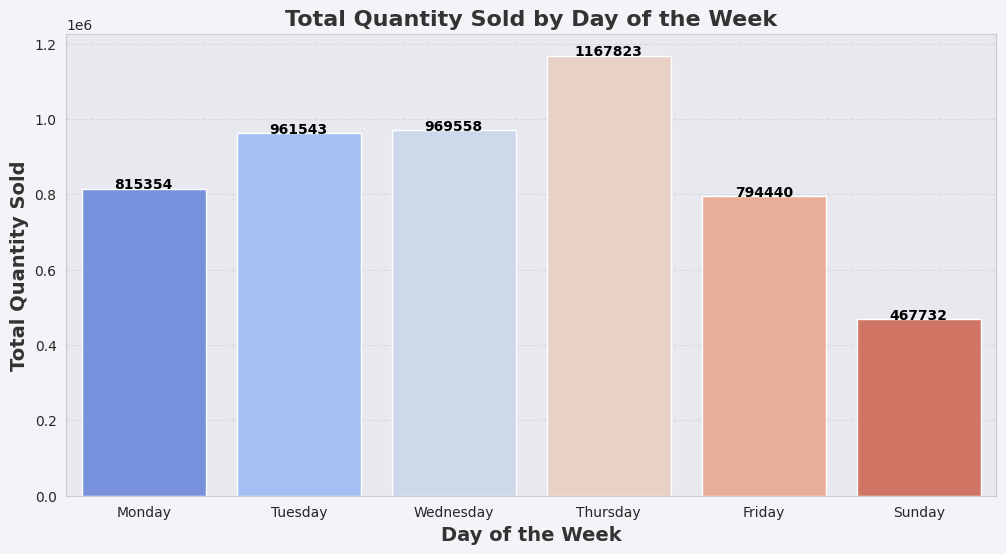

In [27]:
# Group by Day of Week to get total quantity sold
DayOfWeek_quantity = df.groupby('DayOfWeek')['Quantity'].sum()

# Map numerical days to actual day names
day_labels = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
              4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
DayOfWeek_quantity.index = DayOfWeek_quantity.index.map(day_labels)

# Set figure size and style
plt.figure(figsize=(12, 6), facecolor="#f4f4f8")
sns.set_style("whitegrid")

# Create a bar plot
ax = sns.barplot(x=DayOfWeek_quantity.index, y=DayOfWeek_quantity.values, palette="coolwarm")

# Titles & labels
plt.title("Total Quantity Sold by Day of the Week", fontsize=16, fontweight='bold', color="#333333")
plt.xlabel("Day of the Week", fontsize=14, fontweight='bold', color="#333333")
plt.ylabel("Total Quantity Sold", fontsize=14, fontweight='bold', color="#333333")

# Add values on bars
for index, value in enumerate(DayOfWeek_quantity.values):
    plt.text(index, value + 500, str(value), ha='center', fontsize=10, fontweight='bold', color="black")

# Improve grid visibility
ax.set_facecolor("#e8e8ef")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


#### **Meaningful Insights from Day-of-Week Quantity Data**  

1️⃣ **Thursday is the Peak Sales Day (1,167,823 units)**

   - **Highest sales occur on Thursdays**, possibly due to restocking by businesses or mid-week shopping habits.  

   - **Action:** Optimize inventory, staffing, and marketing campaigns to **maximize Thursday sales**.  

2️⃣ **Monday & Wednesday Have Strong Sales (960K+ units)**

   - These days also show high transaction volumes, indicating **consistent weekday demand**.  
   
   - **Action:** Offer **weekday promotions** to maintain strong momentum.  

3️⃣ **Friday & Sunday See the Lowest Sales**

   - **Friday (794K) and Sunday (467K) have the lowest transactions**—customers may be shifting focus to weekend plans.  
   
   - **Action:** Consider **special weekend deals** to boost sales.  


____

####**Objective:**

Pinpoint busiest & slowest sales hours to optimize operations and marketing timing.  


In [28]:
Hour_quantity = df.groupby('Hour')['Quantity'].sum()
Hour_quantity

,Quantity
Hour,
6,-86
7,15361
8,158163
9,429366
10,684416
11,637672
12,823935
13,676803
14,571549


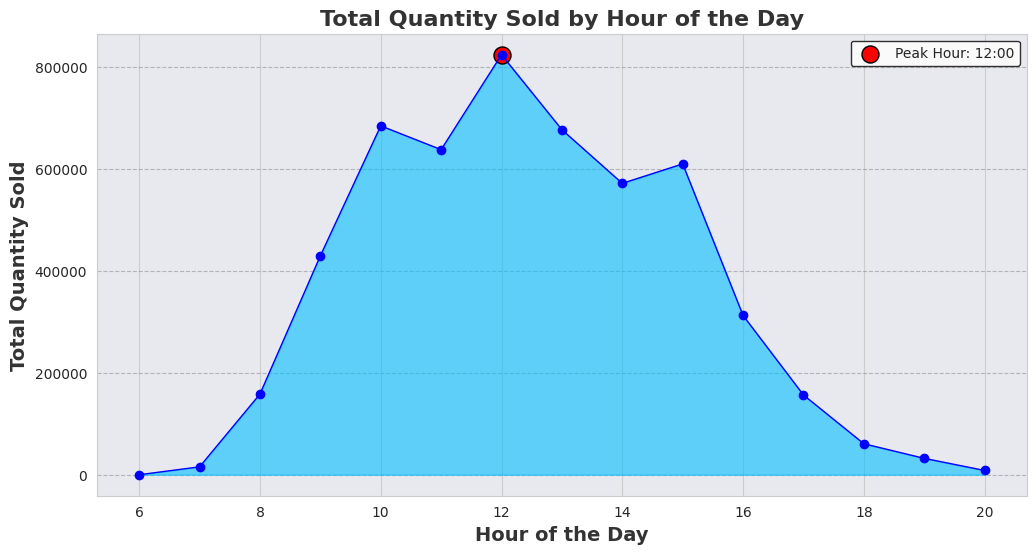

In [29]:
# Group by Hour to get total quantity sold
Hour_quantity = df.groupby('Hour')['Quantity'].sum()

# Set figure size and style
fig, ax = plt.subplots(figsize=(12, 6))  # Light grayish background
sns.set_style("whitegrid")

# Create an area plot
ax.fill_between(Hour_quantity.index, Hour_quantity.values, color="deepskyblue", alpha=0.6)

# Line for emphasis
ax.plot(Hour_quantity.index, Hour_quantity.values, marker="o", color="blue", linewidth=1)

# Titles & labels
ax.set_title("Total Quantity Sold by Hour of the Day", fontsize=16, fontweight='bold', color="#333333")
ax.set_xlabel("Hour of the Day", fontsize=14, fontweight='bold', color="#333333")
ax.set_ylabel("Total Quantity Sold", fontsize=14, fontweight='bold', color="#333333")

# Highlighting peak hour
peak_hour = Hour_quantity.idxmax()
peak_value = Hour_quantity.max()
ax.scatter(peak_hour, peak_value, color="red", s=150, edgecolors="black", label=f"Peak Hour: {peak_hour}:00")

# Set the plot background color
ax.set_facecolor("#e8e8ef")  # Light bluish-gray background

# Show legend
ax.legend(facecolor="white", edgecolor="black")

# Improve grid visibility
ax.grid(axis='y', linestyle='--', alpha=0.5, color="gray")

plt.show()


#### **Meaningful Insights from Hourly Sales Data**  

1️⃣ **Peak Sales at Noon (12 PM - 823,935 units)**  

   - The highest sales occur around **midday (12 PM)**, likely due to **business purchases, restocking, or lunch-hour shopping**.  

   - **Action:** Ensure **inventory is well-stocked and staff is available** during peak hours.  

2️⃣ **Strong Sales from 9 AM - 3 PM**

   - High transaction volumes between **9 AM - 3 PM** suggest it is the prime shopping window.

   - **Action:** Run **midday promotions or flash sales** to maximize revenue.  

3️⃣ **Sales Drop After 4 PM**

   - Sales gradually decline after **4 PM**, with a significant drop in the evening (6 PM onward).

   - **Action:** Consider **targeted evening promotions** to drive post-work purchases.  

4️⃣ **Very Low Sales at Night (6 AM, 7 PM - 8 PM)**  

   - Almost no transactions occur at night, with **6 AM showing negative quantity (-86),** possibly indicating refunds or cancellations.  
   
   - **Action:** Investigate if early morning transactions involve **returns, cancellations, or data entry errors**.  

5️⃣ **Early Morning & Late Evening Have Minimal Sales**  
   - **6 AM to 8 AM & after 7 PM have very low transactions**—most likely outside active business hours.  

   - **Action:** **Optimize operational hours** and **schedule system maintenance or inventory updates** during low-traffic periods.  


____

####**Objective:**

Find top 10 best-selling products to optimize stock and boost sales.  


In [30]:
top_products = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products

,Quantity
StockCode,
22197,56450
84077,53847
85099B,47363
85123A,38830
84879,36221
21212,36039
23084,30646
22492,26437
22616,26315


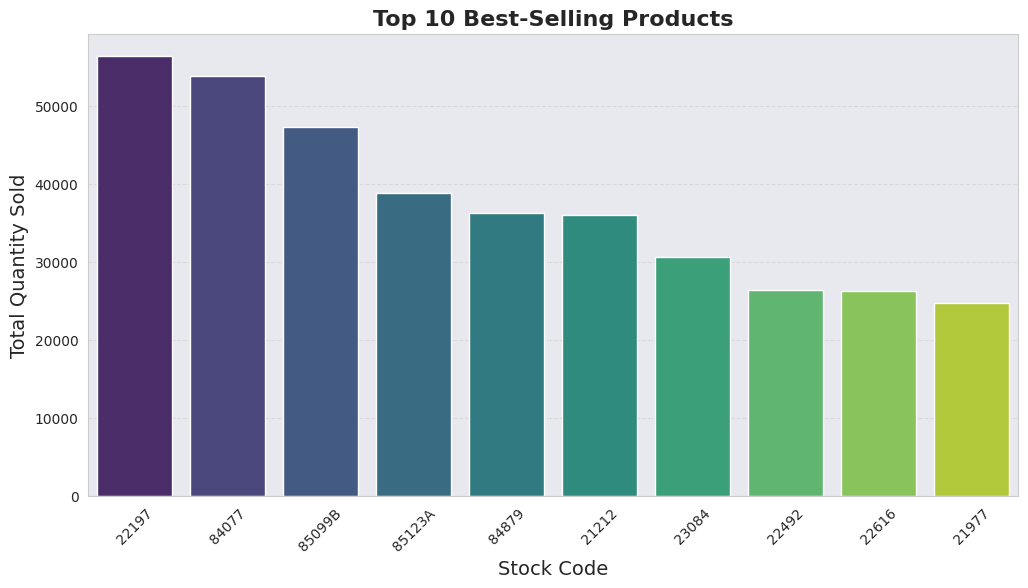

In [31]:
# Group by StockCode and sum Quantity
top_products = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot Top-Selling Products
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
ax.set_facecolor("#e8e8ef")
plt.title("Top 10 Best-Selling Products", fontsize=16, fontweight='bold')
plt.xlabel("Stock Code", fontsize=14)
plt.ylabel("Total Quantity Sold", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#### **Insights from the Top-Selling StockCode & Quantity Data**  

1️⃣ **High-Demand Products:**  
   
   - **StockCode 22197 (56,450 units)** is the **top-selling product**, followed closely by **StockCode 84077 (53,847 units)**.  
   
   - These items need **consistent restocking** to prevent stockouts and lost revenue.  

2️⃣ **Product Popularity Distribution:**  
   
   - The **top 10 products contribute significantly** to total sales, meaning a small number of items **drive most of the revenue**.  
   
   - Focusing on these high-demand items can **optimize inventory & sales strategies**.  

3️⃣ **Potential Bundling Opportunities:**  
   
   - Products with similar demand trends (e.g., **85123A, 84879, 21212**) may be **related or frequently bought together**.  
   
   - Consider **bundling these products** for **upselling opportunities**.  

4️⃣ **Price Sensitivity Considerations:**  
   
   - If these products are **low-priced**, they may be **impulse buys**—consider **small price increases** without affecting demand.  
   
   - If high-priced, customers value them despite the cost, meaning **premium pricing** might work.  

5️⃣ **Inventory Optimization:**  

   - **Monitor stock levels** of these items regularly.  

   - Automate **restocking alerts** to prevent shortages.  


_____

####**Objective:**  

Pinpoint **top 10 countries driving sales** to focus marketing, logistics, and inventory efforts.  


In [32]:
Top_Countries_quantity = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
Top_Countries_quantity

,Quantity
Country,
United Kingdom,4263829
Netherlands,200128
EIRE,142637
Germany,117448
France,110480
Australia,83653
Sweden,35637
Switzerland,30325
Spain,26824


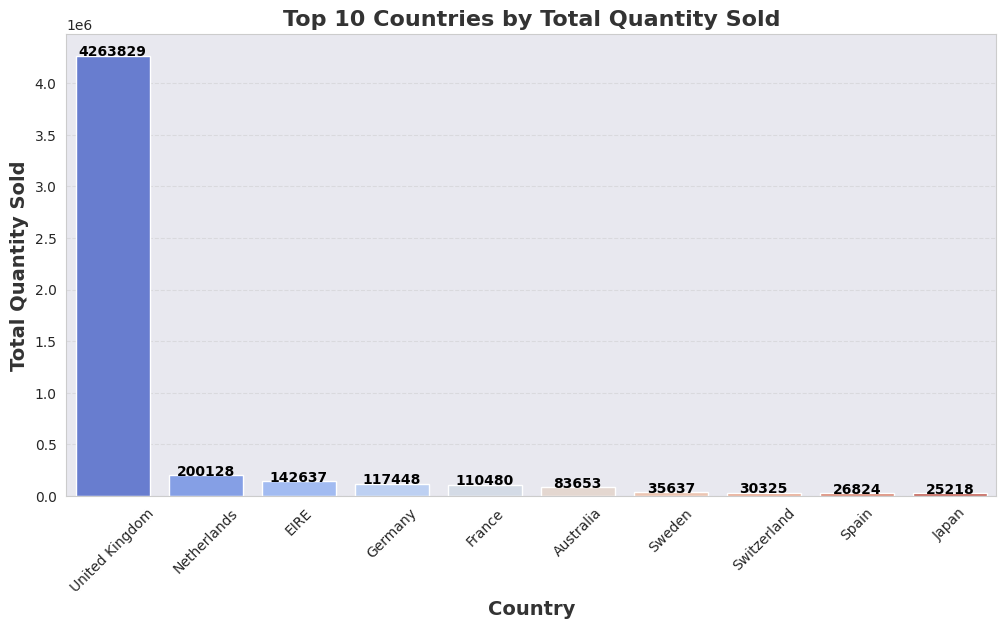

In [33]:
# Set figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a bar plot
ax = sns.barplot(x=Top_Countries_quantity.index, y=Top_Countries_quantity.values, palette="coolwarm")

# Titles & labels
plt.title("Top 10 Countries by Total Quantity Sold", fontsize=16, fontweight='bold', color="#333333")
plt.xlabel("Country", fontsize=14, fontweight='bold', color="#333333")
plt.ylabel("Total Quantity Sold", fontsize=14, fontweight='bold', color="#333333")

# Add values on bars
for index, value in enumerate(Top_Countries_quantity.values):
    plt.text(index, value + 500, str(value), ha='center', fontsize=10, fontweight='bold', color="black")

# Improve grid visibility
ax.set_facecolor("#e8e8ef")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.xticks(rotation=45)
plt.show()


#### **Meaningful Insights from Country-Wise Sales Data**  

- **United Kingdom dominates sales** → **4.26M units**, far higher than
other countries, indicating a **primary market focus**.  

- **Netherlands, EIRE, and Germany are strong secondary markets** → Potential for expansion or targeted marketing.  

- **Lower sales in Spain, Japan, and Switzerland** → Could indicate **less demand, shipping constraints, or untapped market potential**.  



____

####**Objective:**  

Analyze UK's monthly sales trends to optimize stock, staffing, and promotions.  


In [34]:
United_Kingdom= df[df['Country'] == "United Kingdom"]

# Group by Month and sum the Quantity sold
uk_monthly_sales = United_Kingdom.groupby('Month')['Quantity'].sum()
uk_monthly_sales


,Quantity
Month,
1,237381
2,225641
3,279843
4,257666
5,306452
6,258522
7,324129
8,319804
9,458490


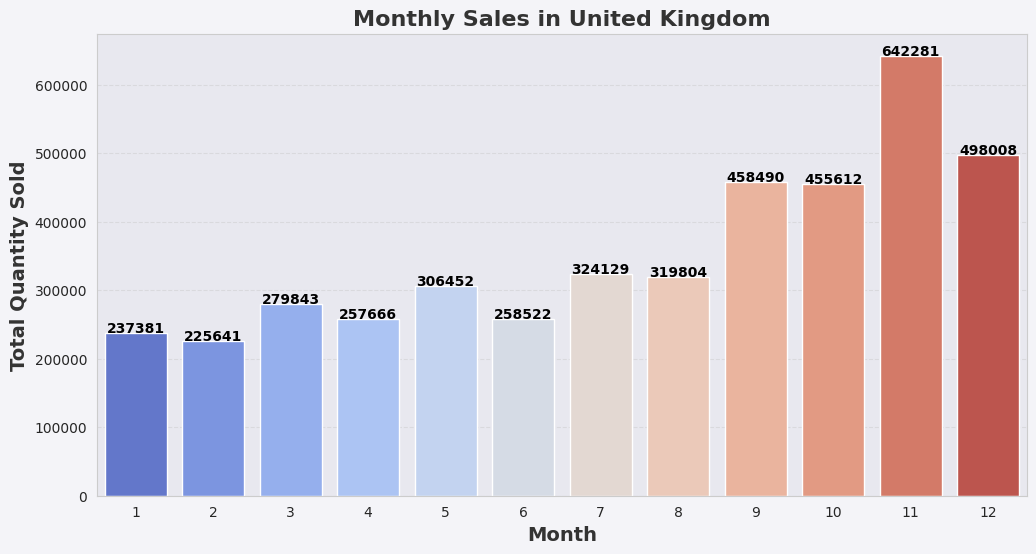

In [35]:
# Set figure size and style
plt.figure(figsize=(12, 6), facecolor="#f4f4f8")
sns.set_style("whitegrid")

# Create a bar plot
ax = sns.barplot(x=uk_monthly_sales.index, y=uk_monthly_sales.values, palette="coolwarm")

# Titles & labels
plt.title("Monthly Sales in United Kingdom", fontsize=16, fontweight='bold', color="#333333")
plt.xlabel("Month", fontsize=14, fontweight='bold', color="#333333")
plt.ylabel("Total Quantity Sold", fontsize=14, fontweight='bold', color="#333333")

# Add values on bars
for index, value in enumerate(uk_monthly_sales.values):
    plt.text(index, value + 500, str(value), ha='center', fontsize=10, fontweight='bold', color="black")

# Improve grid visibility
ax.set_facecolor("#e8e8ef")
plt.grid(axis='y', linestyle='--', alpha=0.5)

#### Analyzing the monthly sales data for the **United Kingdom**, we can derive the following meaningful insights:

### **1. Seasonal Trends**
   
   - **Highest sales in November (642,281 units) and December (498,008 units)**  
   
     → This suggests that there is a strong demand during the holiday season, likely due to **Christmas shopping, Black Friday, or end-of-year sales**.
   
   - **Lowest sales in February (225,641 units)**  
     → February tends to be slower, possibly due to **post-holiday slowdowns and fewer shopping events**.

### **2. Growth Trend Over the Year**
   
   - Sales **gradually increase from February to November**, peaking in **November**, followed by a slight drop in **December**.
   
   - This could indicate a **rising demand as the year progresses**, possibly due to businesses preparing for the holiday season.

### **3. Possible Business Strategies**
   
   - **Increase marketing efforts in Q1 (January-March)** to counter the seasonal dip in sales.
   
   - **Stock up inventory before Q4 (October-December)** to handle increased demand.

   - **Introduce discounts or promotions in slower months (Feb-April)** to boost sales.

_____

## ***5. Feature Engineering & Data Pre-processing***

###**Sentiment Analysis on Descriptions column :**

In [36]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download stopwords if not already available
nltk.download('stopwords')
nltk.download('punkt_tab')

# Load dataset (assuming df is your dataframe)
df['Description'] = df['Description'].astype(str)  # Ensure it's a string type

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = word_tokenize(text)  # Tokenize words
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return " ".join(words)

# Apply text cleaning
df['Cleaned_Description'] = df['Description'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


**This code cleans the text data by removing numbers, punctuation, and stopwords, and converts it to lowercase. It prepares the Description column for further analysis or modeling.**

___

In [37]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER
nltk.download('vader_lexicon')

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment scoring
df['Sentiment_Score'] = df['Cleaned_Description'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize Sentiments
df['Sentiment_Label'] = df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


**The objective of this code is to analyze the sentiment of the Description text and categorize it as Positive, Negative, or Neutral. This helps understand customer opinions and can be used to enhance further analysis or models.**

____

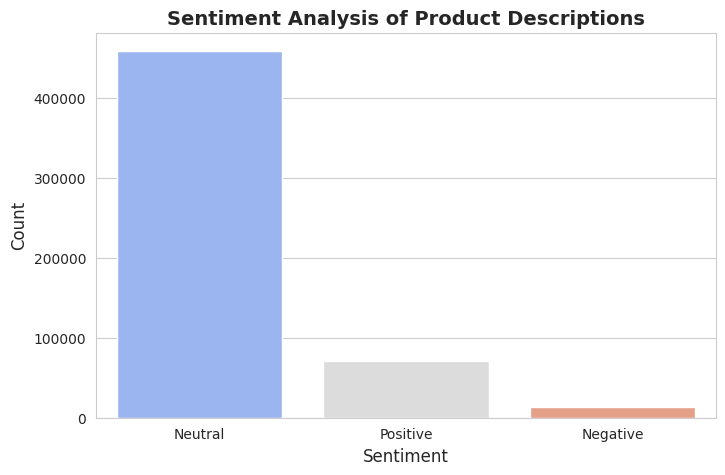

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Sentiment_Label'], palette="coolwarm")
plt.title("Sentiment Analysis of Product Descriptions", fontsize=14, fontweight='bold')
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


**The objective of this code is to visualize the distribution of Positive, Negative, and Neutral sentiments in the dataset, helping to understand the overall sentiment trend of product descriptions.**


___

In [39]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Year,Month,Day,Hour,DayOfWeek,Cleaned_Description,Sentiment_Score,Sentiment_Label
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,2010,12,1,8,2,white hanging heart tlight holder,0.0,Neutral
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,2010,12,1,8,2,white metal lantern,0.0,Neutral
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,2010,12,1,8,2,cream cupid hearts coat hanger,0.0,Neutral
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,2010,12,1,8,2,knitted union flag hot water bottle,0.0,Neutral
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,2010,12,1,8,2,red woolly hottie white heart,0.0,Neutral


**After applying sentiment analysis, checking df.head() allows us to view the first few rows of the dataset, including the newly added Sentiment_Score and Sentiment_Label columns. This gives us a quick overview of how the sentiment scores and labels look for the product descriptions.**

____

In [40]:
df['Sentiment_Label'].value_counts()

,count
Sentiment_Label,
Neutral,458649
Positive,70377
Negative,12883


#### **The objective of this code is to count how many Positive, Negative, and Neutral sentiments are in the dataset, helping to understand the overall sentiment distribution.**

_____

 #### **Conversion of Cleaned Descriptions to TF-IDF Features**

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=500)  # Limit to 500 features to reduce dimensionality

# Fit and transform the 'Cleaned_Description' column
tfidf_matrix = tfidf.fit_transform(df['Cleaned_Description'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())


**The objective of this code is to convert the Cleaned_Description text into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency), preparing the data for further analysis or modeling. The number of features is limited to 500 to reduce dimensionality.**

_____

###**Data Preparation for Clustering: Combining Numerical and TF-IDF Features :**

In [42]:
df = df.drop(columns=['InvoiceNo', 'Description'])
df_cluster = pd.concat([df[['Quantity', 'UnitPrice', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'Sentiment_Score']], tfidf_df], axis=1)

**The objective of this code is to prepare the dataset for clustering by removing unnecessary columns (InvoiceNo and Description) and combining relevant numerical features with the TF-IDF features from the Cleaned_Description into a new dataset (df_cluster).**

____

## ***6. Cluster Model Implementation***

### **Feature Standardization for Clustering :**

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

**The objective of this code is to standardize the features in the df_cluster dataset using StandardScaler, ensuring all features have a mean of 0 and a standard deviation of 1 for improved clustering performance.**

____

### **K-Means Clustering :**

#### The objective of this code is to use the **Elbow Method** to find the optimal number of clusters for K-Means by plotting the inertia values against the number of clusters. This helps identify the best K for clustering.

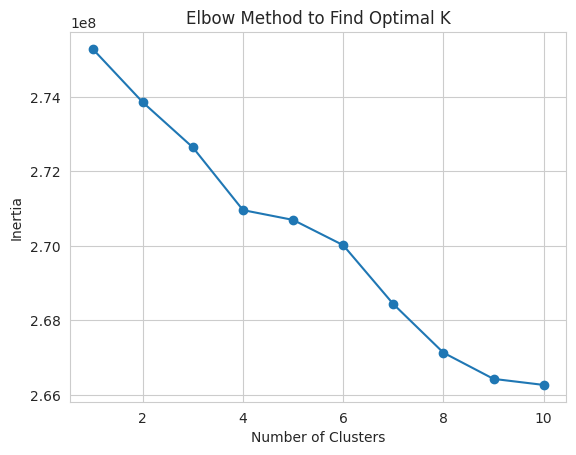

In [44]:
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal K')
plt.show()


**The Elbow Method helps determine the optimal number of clusters for K-Means by identifying the point where inertia decreases sharply and then levels off. This ensures an efficient and balanced clustering model, avoiding overfitting or underfitting. The "elbow" point on the plot suggests the best number of clusters.**

_____

###**K-Means Clustering with 4 Clusters :**

In [45]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

**The objective of this code is to apply K-Means clustering with 4 clusters to the scaled data and assign each data point to a cluster, storing the results in the Cluster column.**

_____

In [46]:
df['Cluster'].value_counts()

,count
Cluster,
1,262154
2,230323
3,48485
0,947


**The objective of this code is to count the number of data points in each cluster, showing the distribution of data across the 4 clusters.**

____

###**Retrieve Cluster Centroids from K-Means :**

In [47]:
cluster_centers = kmeans.cluster_centers_

**The objective of this code is to retrieve and display the central coordinates (centroids) of each of the 4 clusters formed by K-Means.**

_____

###**PCA for Visualizing Customer Segmentation Clusters :**

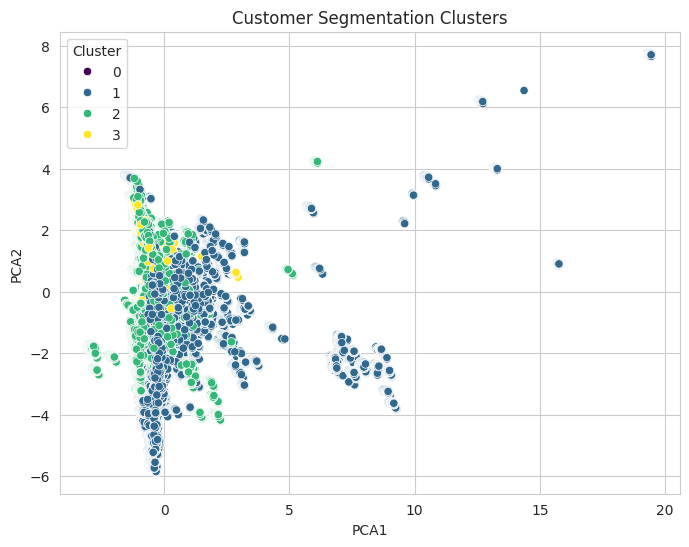

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'], df['PCA2'] = df_pca[:, 0], df_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title("Customer Segmentation Clusters")
plt.show()

**The objective of this code is to reduce the dataset to two principal components using PCA and visualize the customer segmentation clusters in a 2D scatter plot.**

____

###**Average Quantity and UnitPrice by Cluster :**

In [49]:
df.groupby('Cluster')[['Quantity', 'UnitPrice']].mean()

,Quantity,UnitPrice
Cluster,,
0,14.638860,0.748933
1,9.044565,3.437521
2,9.522497,6.289419
3,12.339239,3.059442


**The objective of this code is to calculate the average Quantity and UnitPrice for each cluster, providing insights into the purchasing patterns of each segment.**

____

#### **Assigning Descriptive Labels to Clusters :**

In [50]:
cluster_labels = {
    0: "Bulk Buyers (Low Cost)",
    1: "Regular Customers",
    2: "High-Spending Customers",
    3: "Moderate Bulk Buyers"
}

df['Cluster_Label'] = df['Cluster'].map(cluster_labels)

**The objective of this code is to assign descriptive labels to each cluster, making it easier to understand the customer segments.**

____

###**Visualizing Customer Segmentation Distribution :**

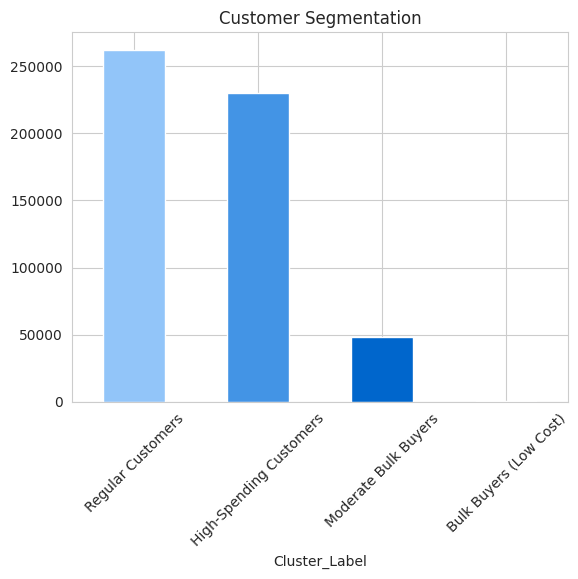

In [51]:
df['Cluster_Label'].value_counts().plot(kind='bar', title="Customer Segmentation", color=['#92C5F9', '#4394E5', '#0066CC', '#004D99'])
plt.xticks(rotation=45)
plt.show()

**The objective of this code is to visualize the distribution of customer segments using a bar chart, showing how many customers belong to each segment.**

###**Conclusion :**

The segmentation analysis identifies four customer types:

1. **Bulk Buyers (Low Cost):** Wholesalers buying large quantities of low-priced items.
2. **Regular Customers:** Shoppers buying moderate amounts of mid-range priced products.
3. **High-Spending Customers:** Premium customers buying fewer, expensive items.
4. **Moderate Bulk Buyers:** Customers purchasing in high quantities at mid-range prices.

This helps in targeting marketing strategies and optimizing inventory.

_____